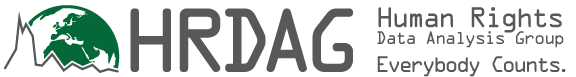

In [126]:
from IPython.display import Image
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

Image(filename='../data/banner.png')

In [127]:
def read_table():
    df = pd.read_csv("../data/blog-post-2.csv")
    return df 

data = read_table()

data

,Model,Data Type,Score,Type,API calls per doc
0,Claude 3 Opus,Reports,0.753000,Full doc,1
1,Claude 3 Opus,Transcripts,0.691000,Full doc,1
2,GPT-4-0125,Reports,0.698000,Full doc,1
3,GPT-4-0125,Transcripts,0.553000,Full doc,1
4,GPT-3-0125,Reports,0.815072,Traditional rag,20
5,GPT-3-0125,Transcripts,0.791220,Traditional rag,20
6,GPT-3.5-0125,Reports,0.828089,Full doc,Determined by page count
7,GPT-3.5-0125,Transcripts,0.940809,Full doc,Determined by page count
8,GPT-3.5-0125,Reports,0.834130,Used NER to find 20 pages with most number of ...,20
9,GPT-3.5-0125,Transcripts,0.832770,Used NER to find 20 pages with most number of ...,20


In the previous chapter, we explored the use of large language models (LLMs), specifically GPT-3 and GPT-4, for structured information extraction from the Innocence Project New Orleans' wrongful conviction case files using traditional retrieval augmented generation (RAG). However, the recent release of GPT-4 with a 128k context window (up from 32k) by OpenAI and the introduction of the Claude 3 family of models by Anthropic, which boast a 200k context window, have prompted us to re-evaluate our processing pipeline. With these increased context windows, an entire document can now fit within the context window, potentially eliminating the need for document retrieval from a vector database. Given these developments, we aim to reconsider the fundamentals of our information extraction pipeline and explore their impact in this follow-up chapter.

**Long Context Retrieval with Claude 3 Opus and GPT-4-0125**


In long context retrieval, entire documents are fed into the model in a single API call, leveraging the model's full reasoning capabilities. This method contrasts with traditional retrieval augmented generation (RAG) methods, which segment large texts into smaller pieces for embedding and indexing in a vector database. Although segmentation (chunking) can optimize the relevance of the retrieved content, it risks overlooking vital contextual information that spans multiple segments. Long context retrieval addresses this issue by processing the entire document in one go, allowing the model to potentially capture intricate relationships and dependencies that segmenting the text might miss. To evaluate the effectiveness of this approach, we tested each model on a varied set of documents, including 10 police reports and 10 court transcripts, which varied in length from 3,000 to 70,000 tokens.

**F-beta Score Comparison**:


In [128]:
data.head(6)

,Model,Data Type,Score,Type,API calls per doc
0,Claude 3 Opus,Reports,0.753000,Full doc,1
1,Claude 3 Opus,Transcripts,0.691000,Full doc,1
2,GPT-4-0125,Reports,0.698000,Full doc,1
3,GPT-4-0125,Transcripts,0.553000,Full doc,1
4,GPT-3-0125,Reports,0.815072,Traditional rag,20
5,GPT-3-0125,Transcripts,0.791220,Traditional rag,20


In [129]:
def calculate_correlation_matrix(data, columns):
    return data[columns].corr()

In [130]:
def analyze_data(data, title):
    X = data[['token_count', 'total_ground_truth']]
    y = data['cumulative_f_beta_score']

    # Fit a Random Forest model
    rf = RandomForestRegressor(n_estimators=100, random_state=42)
    rf.fit(X, y)

    # Predictions and model evaluation
    predictions = rf.predict(X)
    mse = mean_squared_error(y, predictions)
    r2 = r2_score(y, predictions)

    # Get feature importance
    importances = rf.feature_importances_
    feature_names = X.columns

    # Output the feature importance
    print(f"\n{title} - Feature Importances:")
    for name, importance in zip(feature_names, importances):
        print(f"{name}: {importance}")

    return mse, r2

**The effect of document size and number of named entities on performance:**

**General** 

Police Reports: 
- Moderate positive correlation (0.5137) between token count and total ground truth.

Court Transcripts: 
- Strong positive correlation (0.6410) indicates a higher increase in named entities with document size.

**Claude 3 Opus:**

Police Reports

Correlation Analysis:
- Token count and F-beta score: -0.1234 
- Total ground truth and F-beta score: -0.1665 

Random Forest Analysis:
- Token count is a better predictor (0.617) than total ground truth (0.383).

Court Transcripts

Correlation Analysis:
- Token count and F-beta score: -0.2418
- Total ground truth and F-beta score: -0.5164

**Using a random forest regressor because the linear regressor was a very poor fit**

Random Forest Analysis:
- Total ground truth is a better predictor (0.663) than token count (0.337).

Police Reports: 
- The weak negative correlations for both token count and total ground truth with the F-beta score suggest a slight decrease in performance with larger documents and more named entities, yet the stronger feature importance of token count (0.617) indicates its predominant influence on model predictions.

Court Transcripts: 
- The moderate to strong negative correlations, particularly for total ground truth, highlight a noticeable decline in performance as document size and complexity increase. The feature importance leans more towards total ground truth (0.663), signifying its major impact on model outcomes, especially in longer and more complex documents like court transcripts.

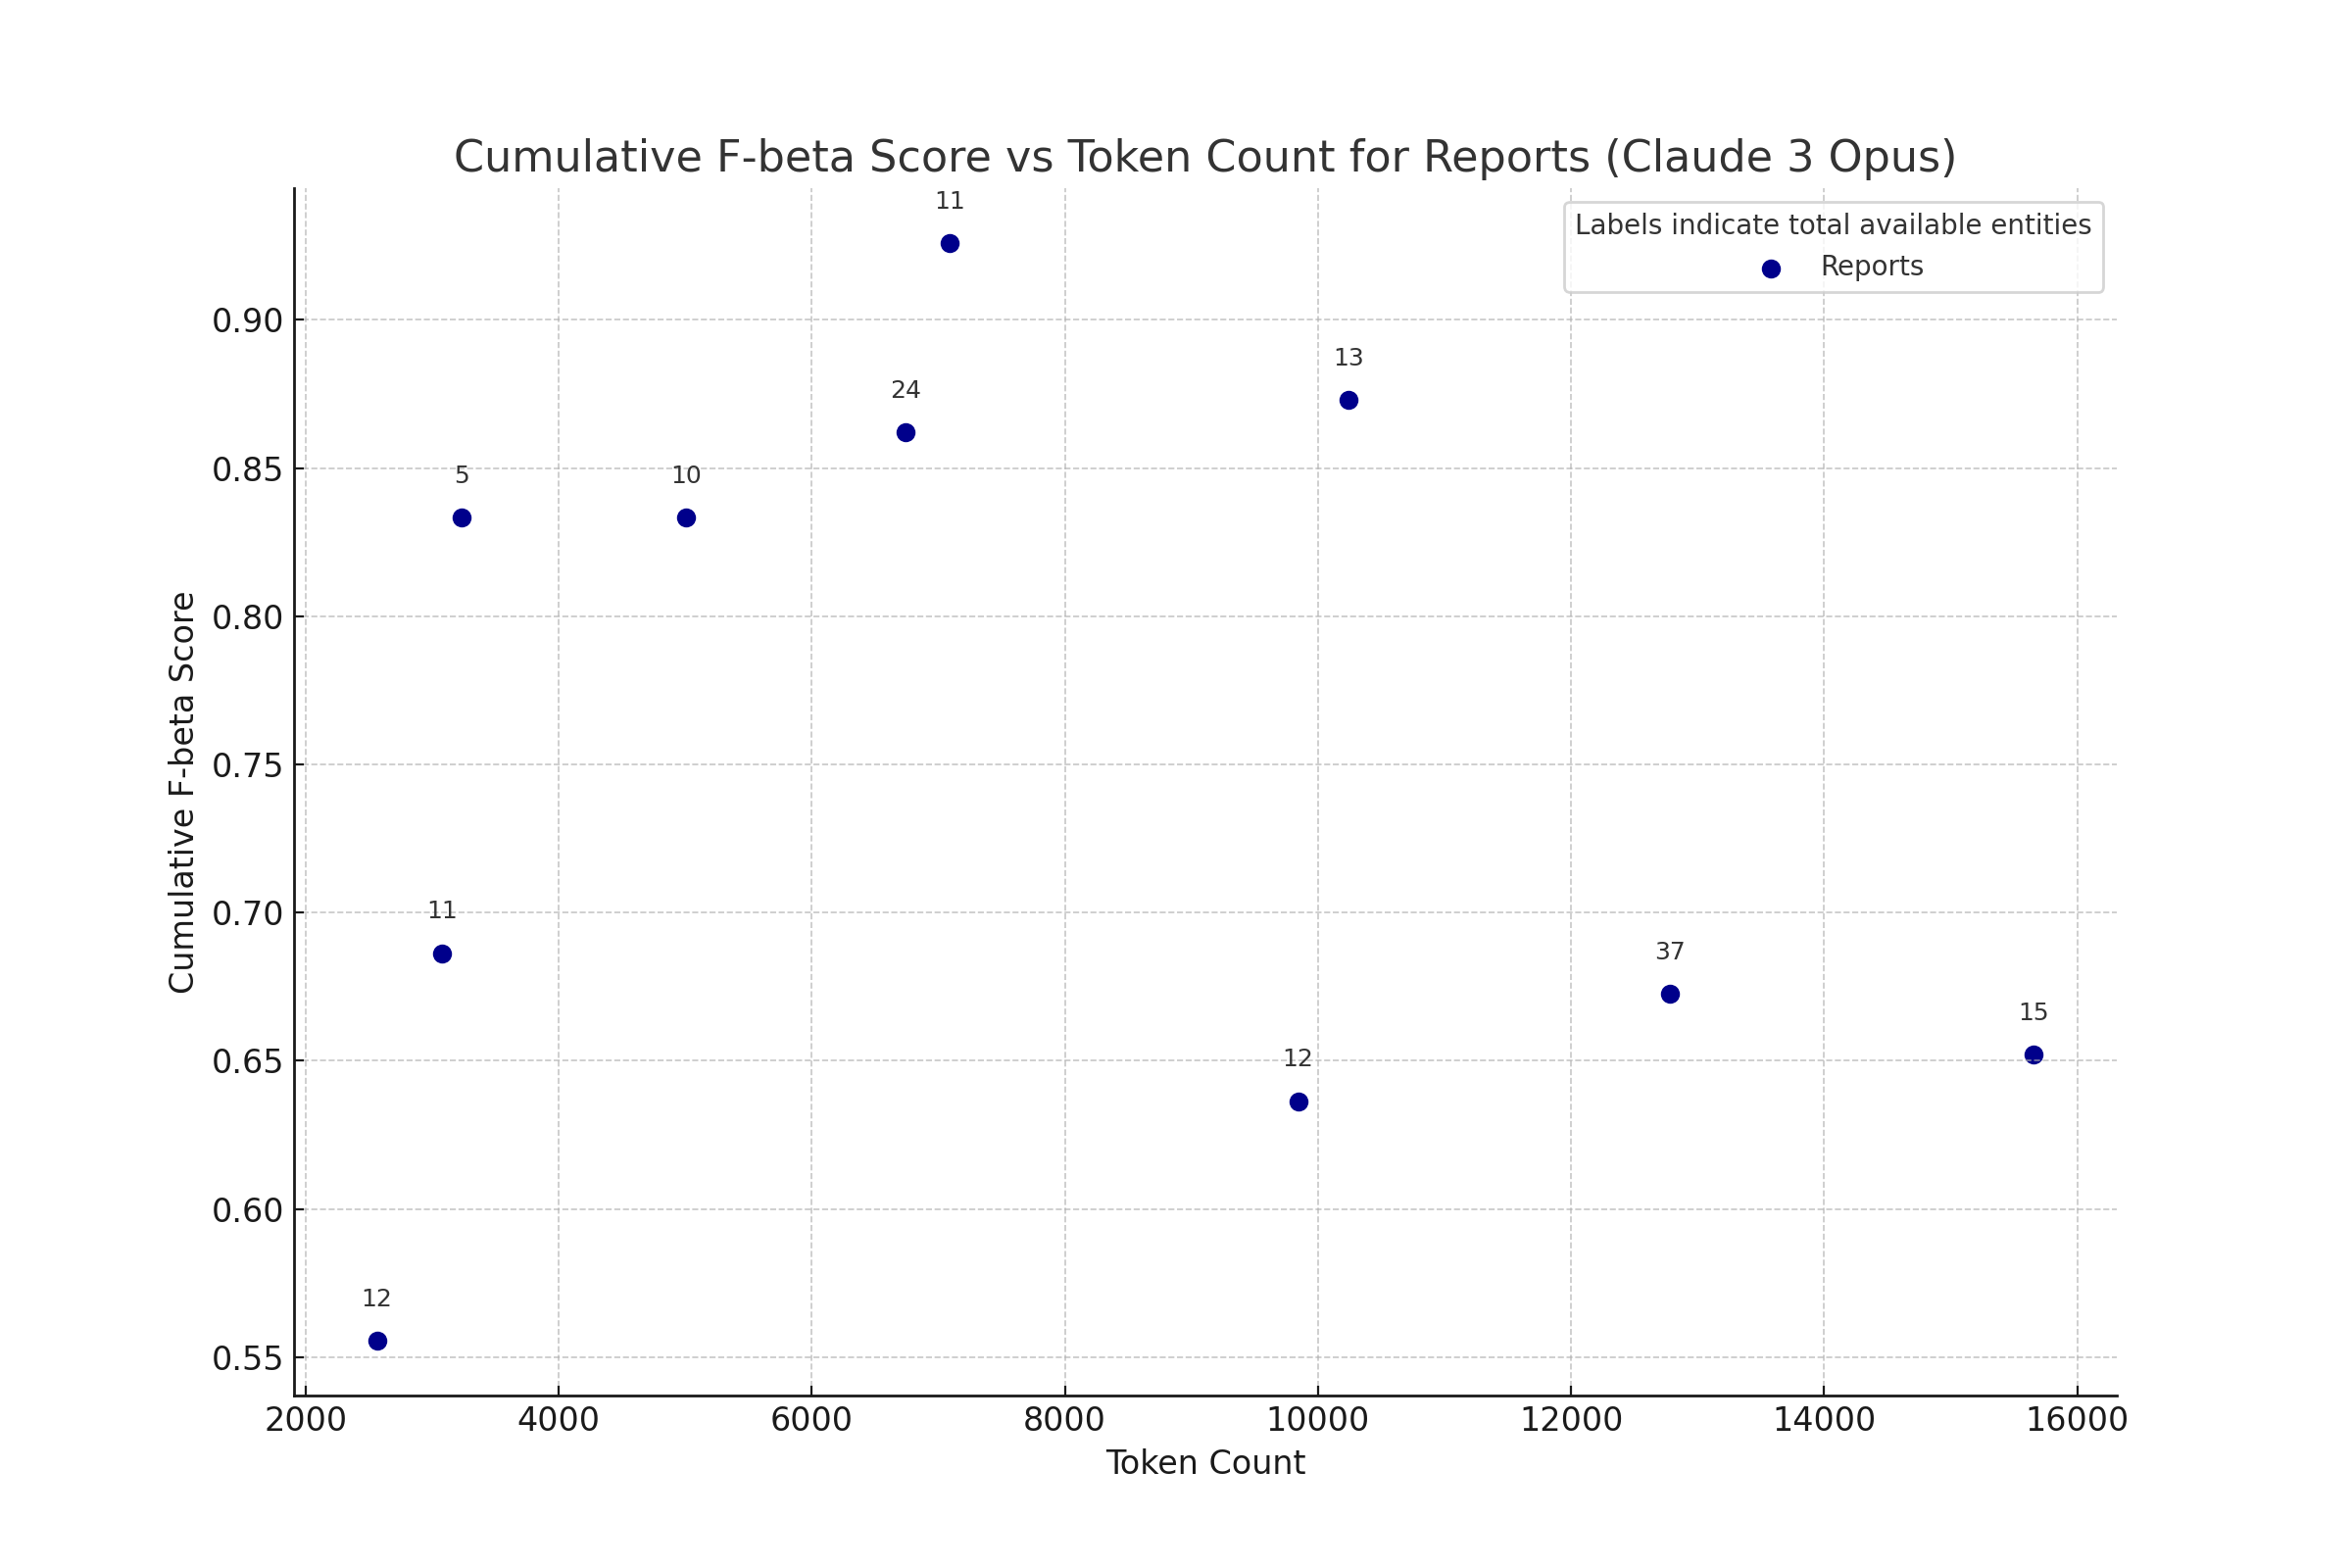

In [131]:
Image(filename='../graphs/reports_opus.png')

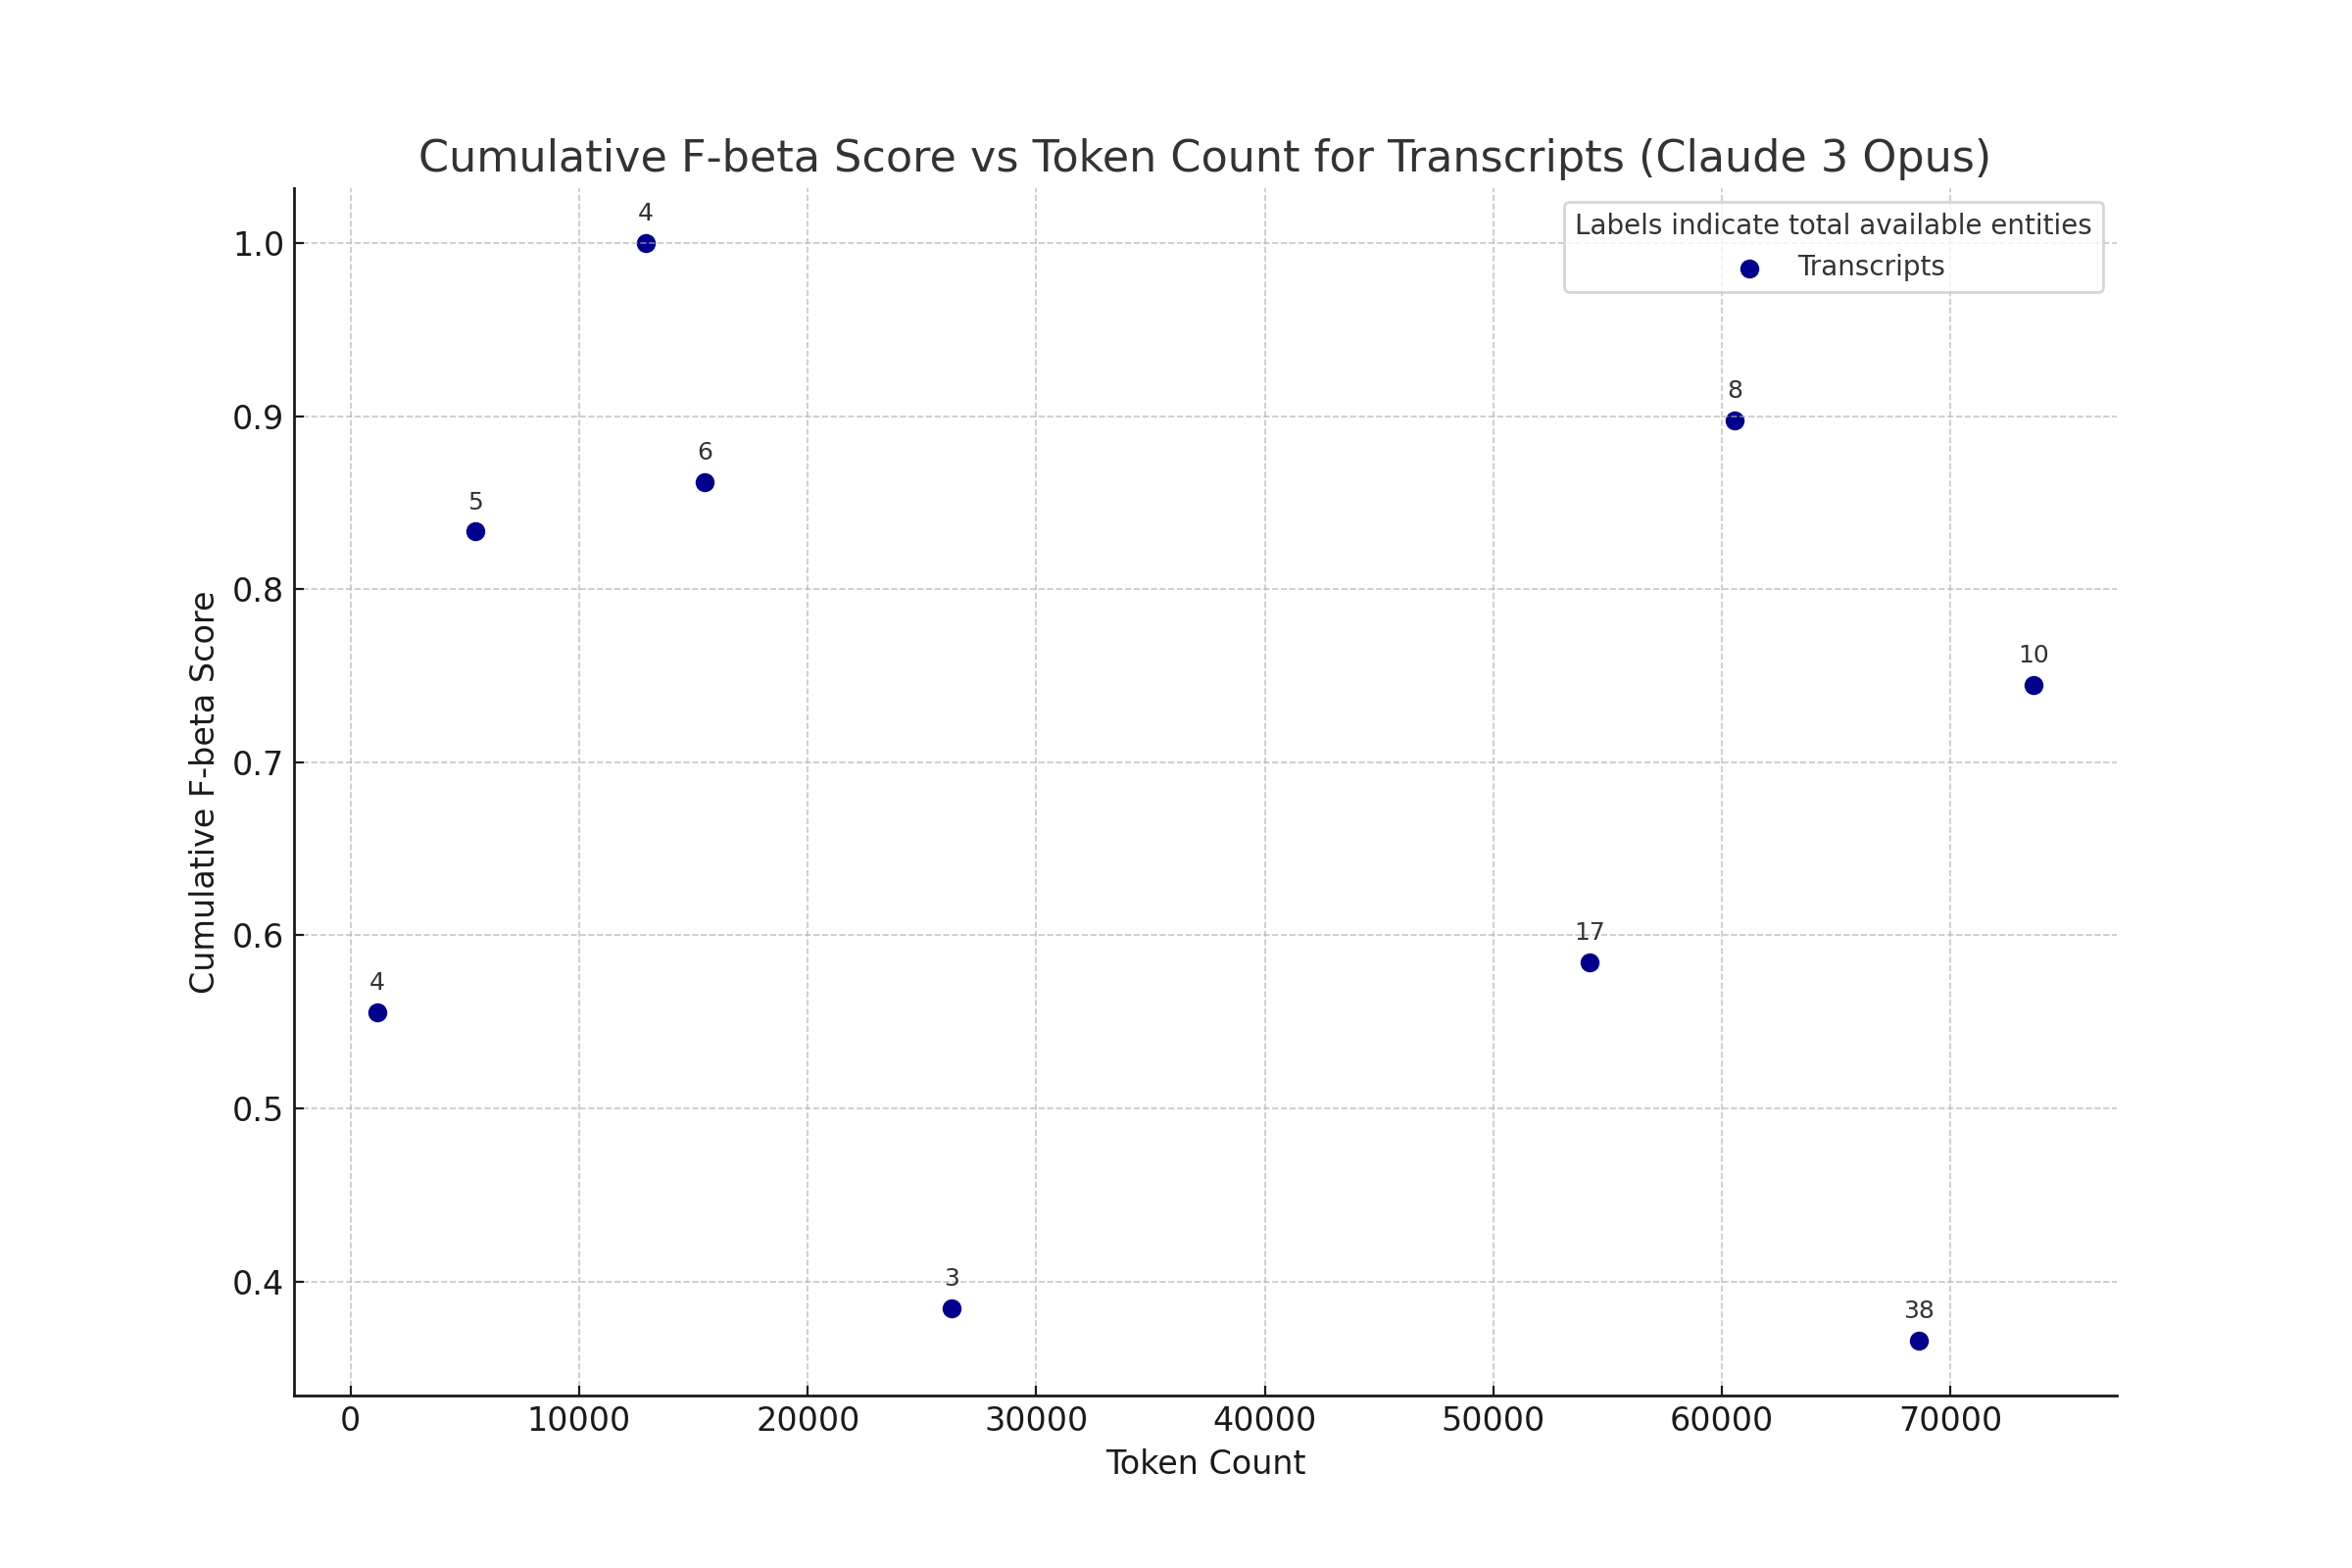

In [132]:
Image(filename='../graphs/transcripts_opus.png')

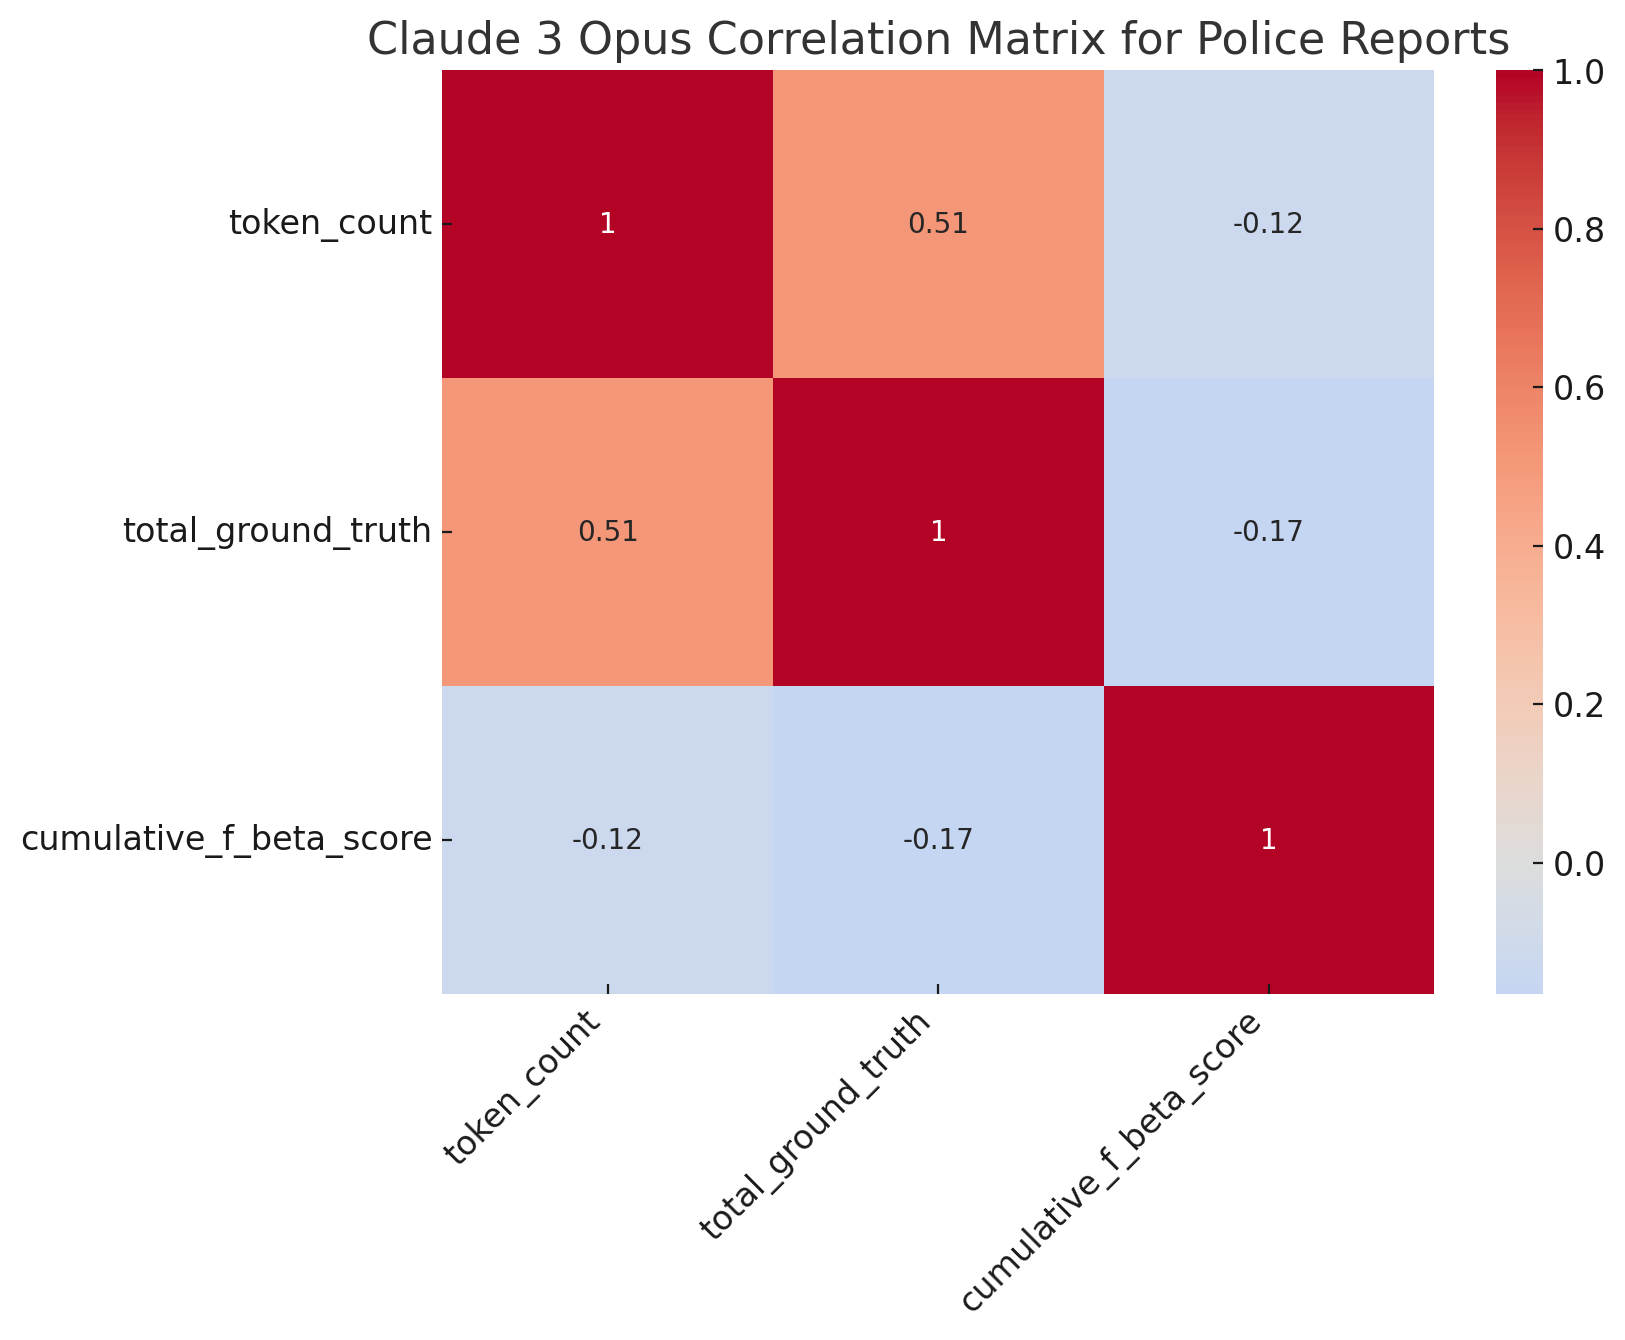

In [133]:
Image(filename='../graphs/opus3_reports_correlation_heatmap.png')

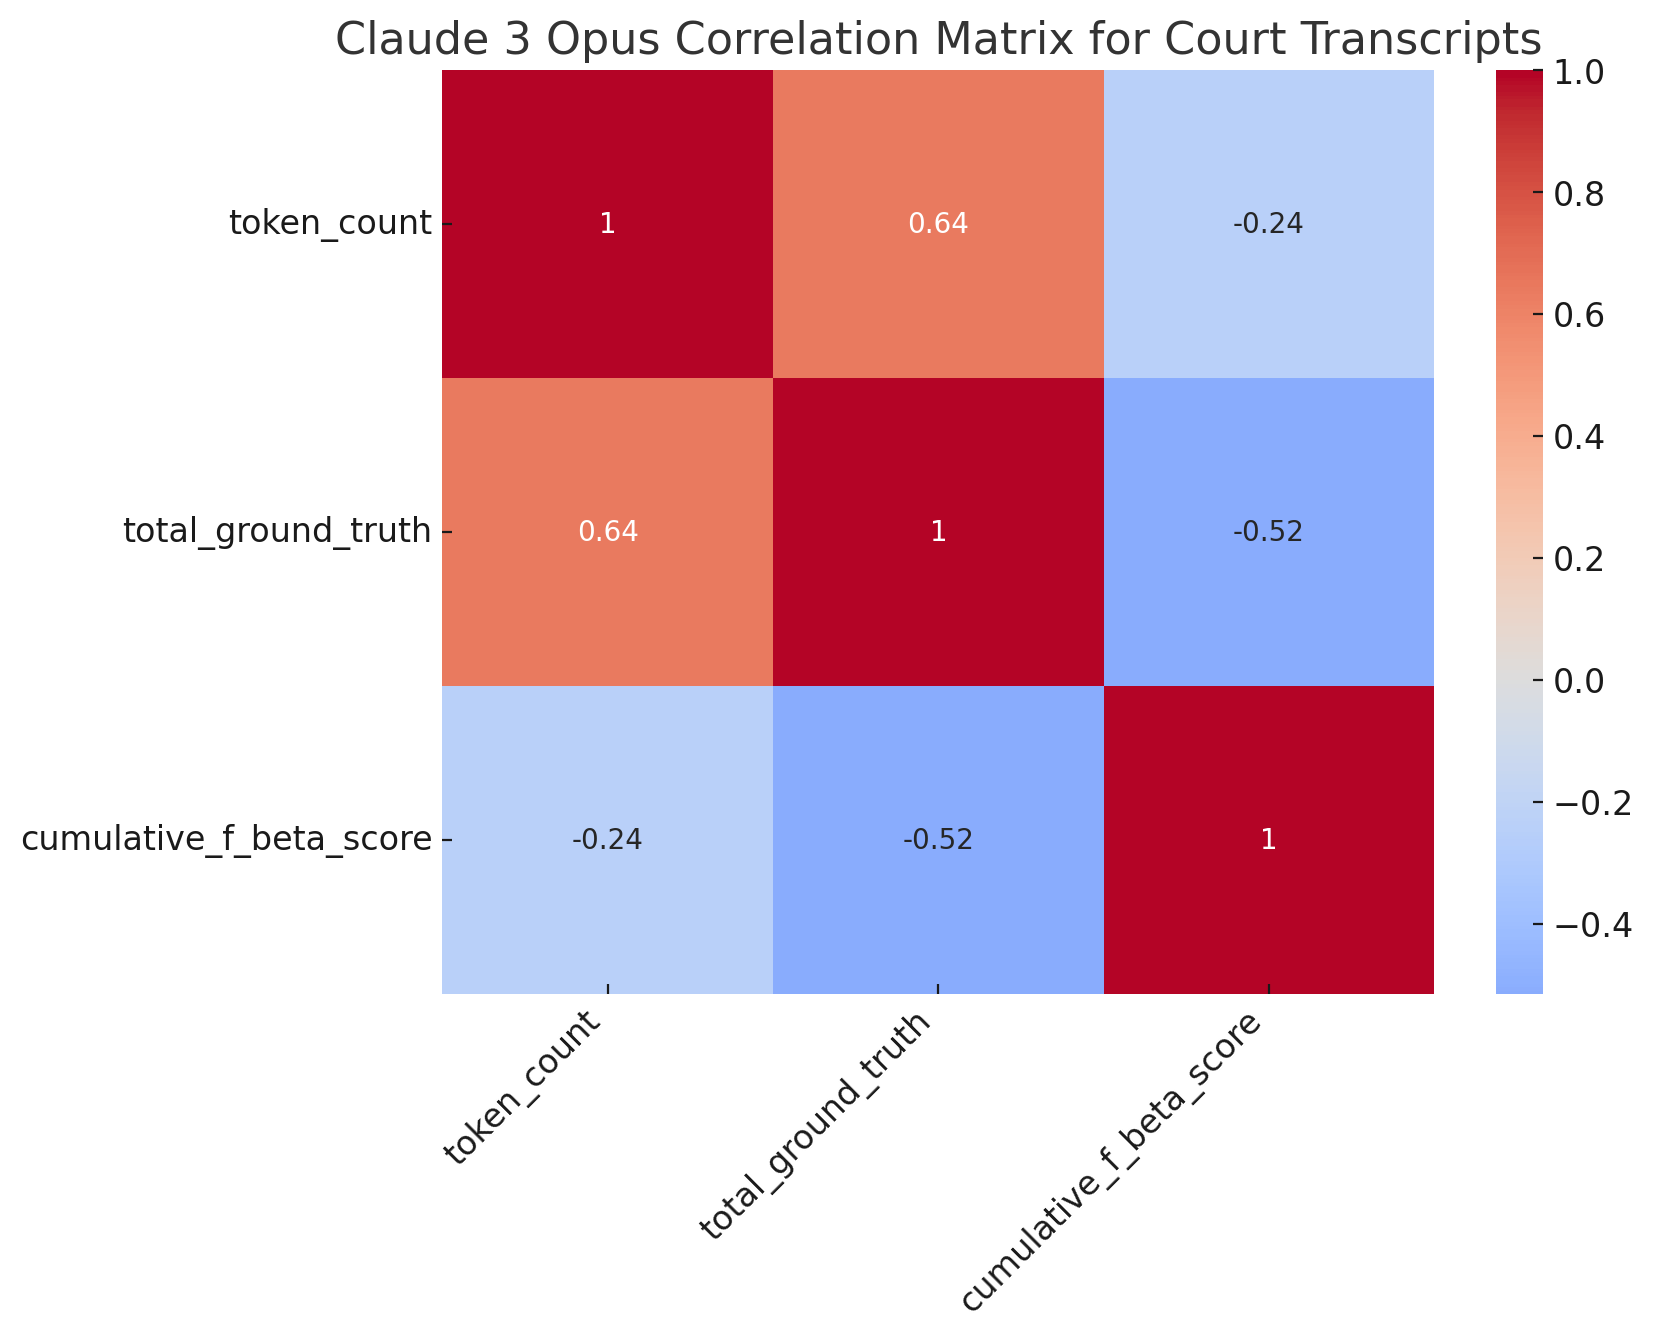

In [134]:
Image(filename='../graphs/opus3_transcripts_correlation_heatmap.png')

**GPT-4-0125:**

Police Reports

Correlation Analysis
- Token count and F-beta score: -0.1138 
- Total ground truth and F-beta score: 0.0487 

Random Forest Analysis
- Token count has stronger feature importance (0.779) than total ground truth, highlighting its significant role in F-beta score predictions.

Court Transcripts

Correlation Analysis
- Token count and F-beta score: -0.7446
- Total ground truth and F-beta score: -0.6562 

Random Forest Analysis
- Balanced feature importance between token count (0.527) and total ground truth (0.473), showing their substantial combined impact on performance.

Police Reports: 
- The weak negative correlation of token count with F-beta score (-0.1138) and the weak positive correlation with total ground truth (0.0487) suggest minimal impact on performance due to document size and entity count. However, the strong feature importance of token count (0.778) implies that it has a significant role in model predictions.

Court Transcripts: 
- The strong negative correlations for both token count and total ground truth with the F-beta score indicate a substantial decrease in performance with increasing document size and complexity. The balanced feature importance between token count (0.527) and total ground truth (0.473) reflects their significant and combined influence on the model's performance.

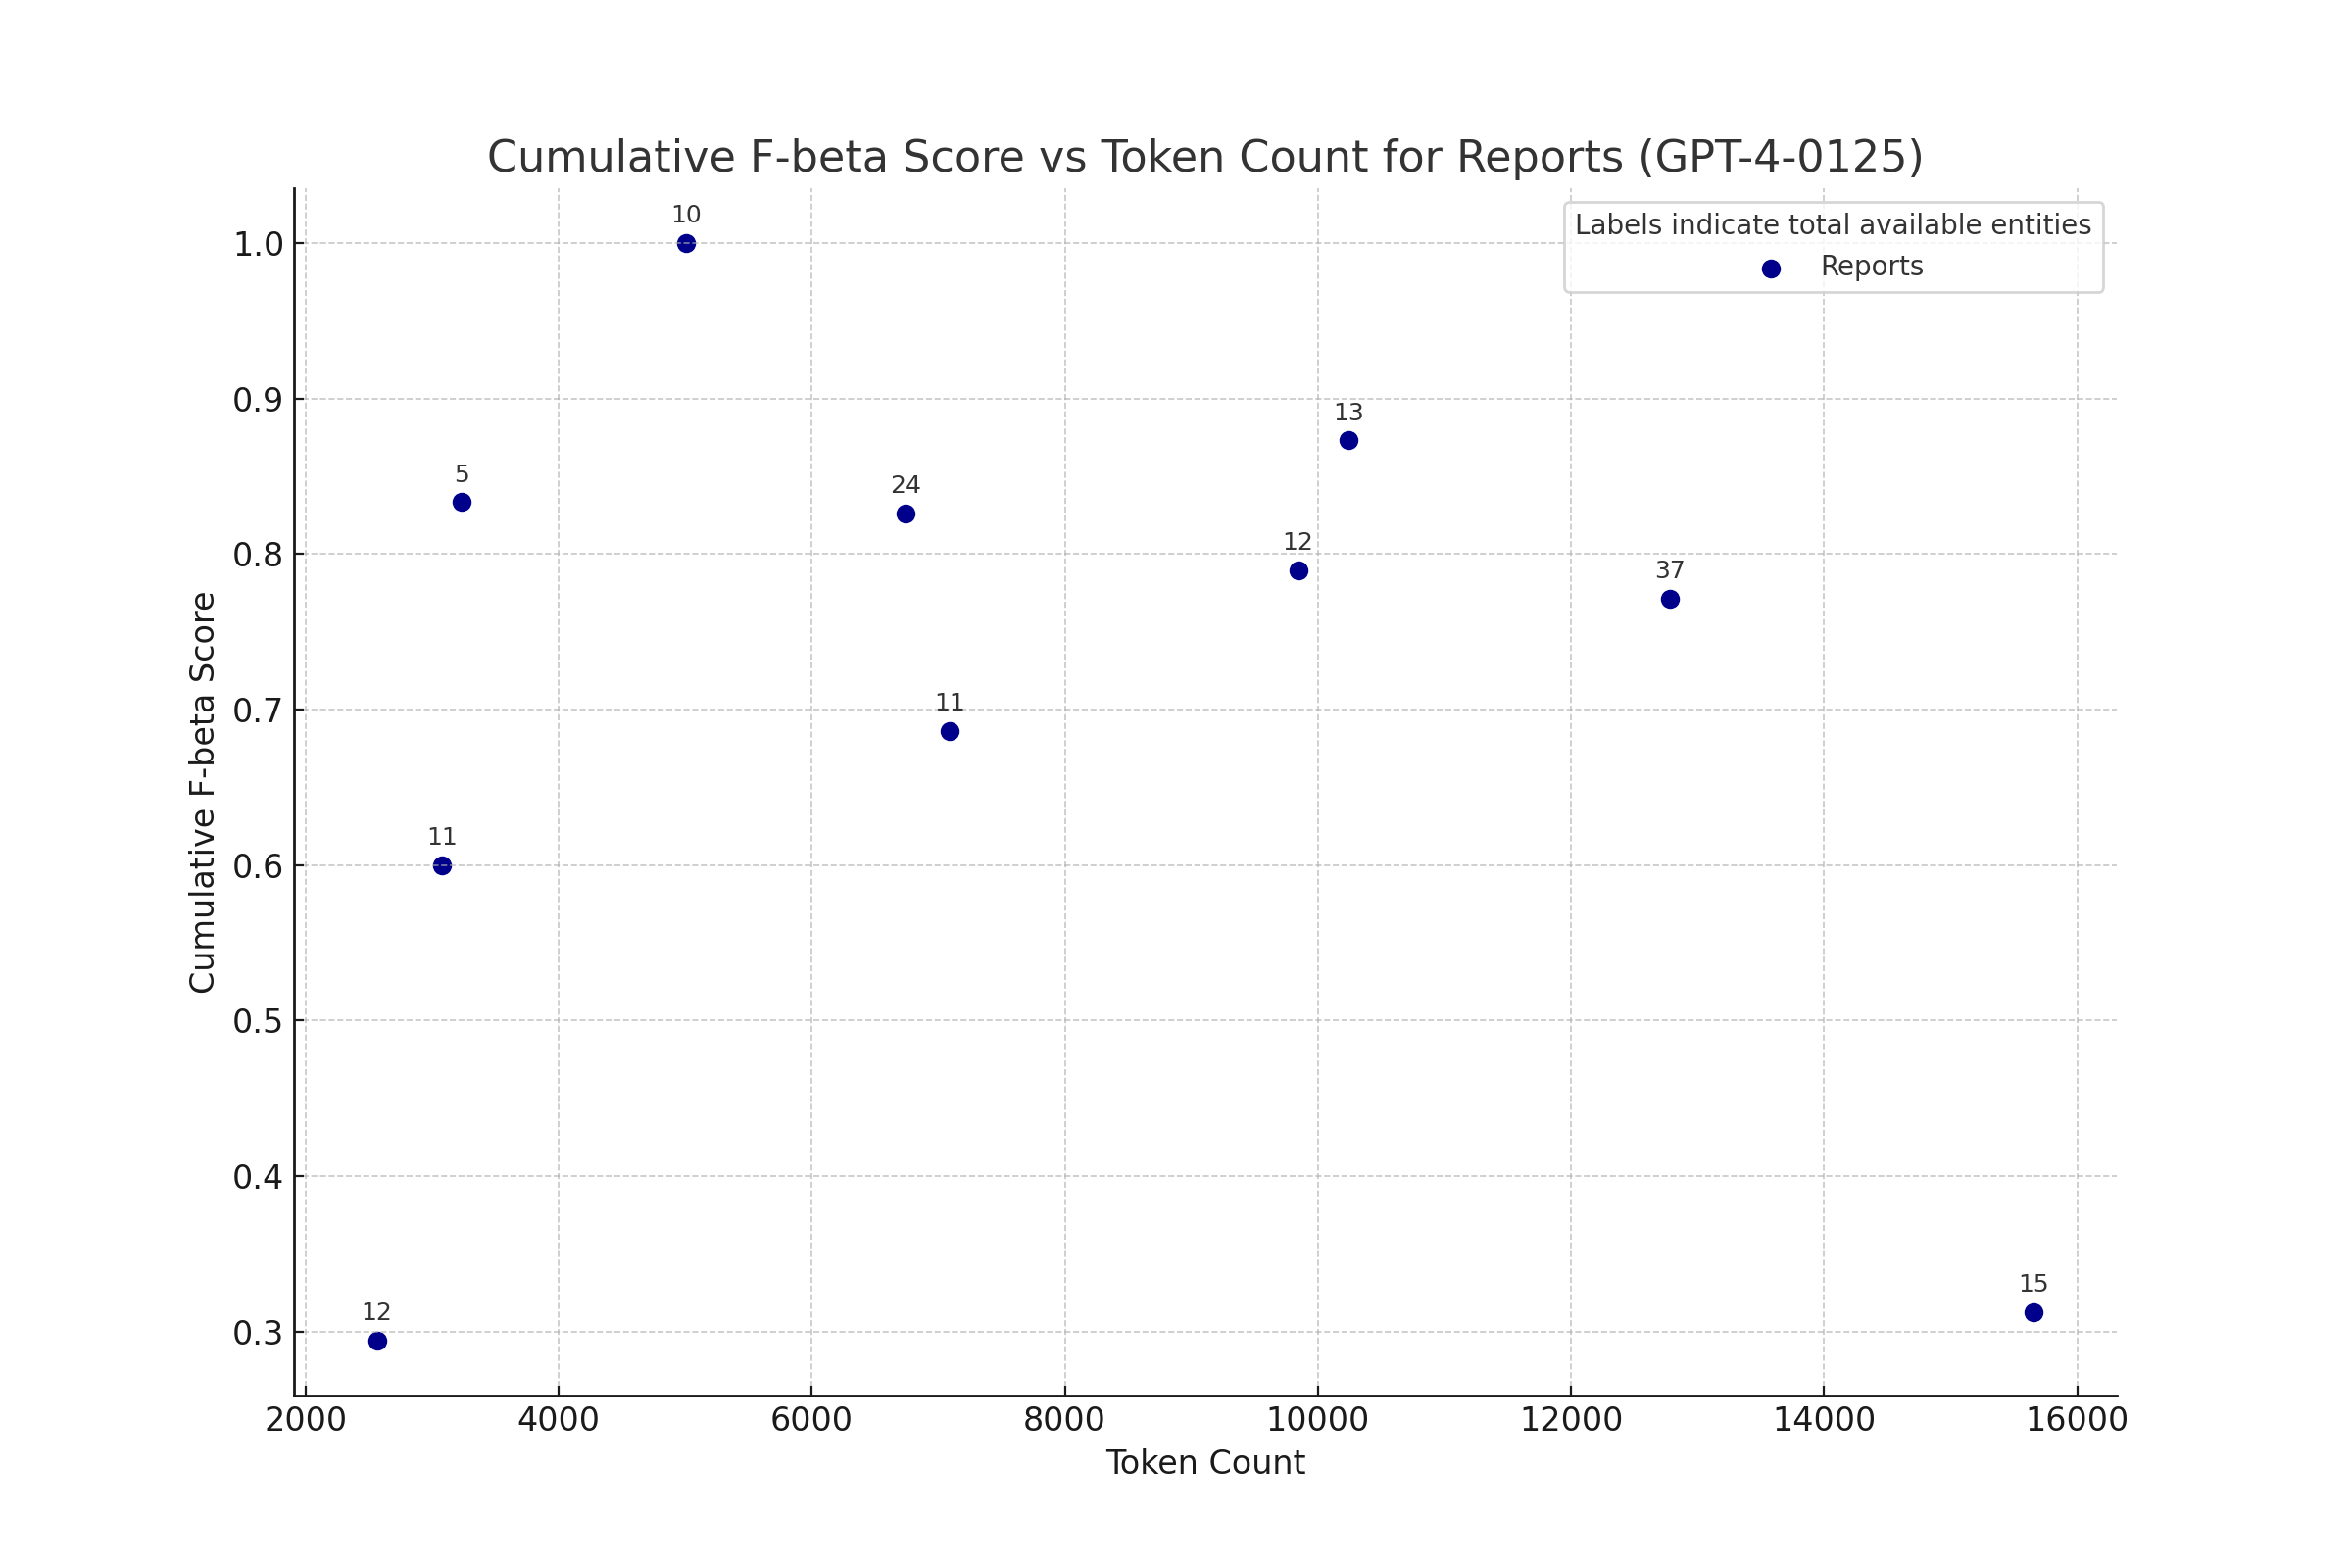

In [135]:
Image(filename='../graphs/reports_gpt-4-0125.png')

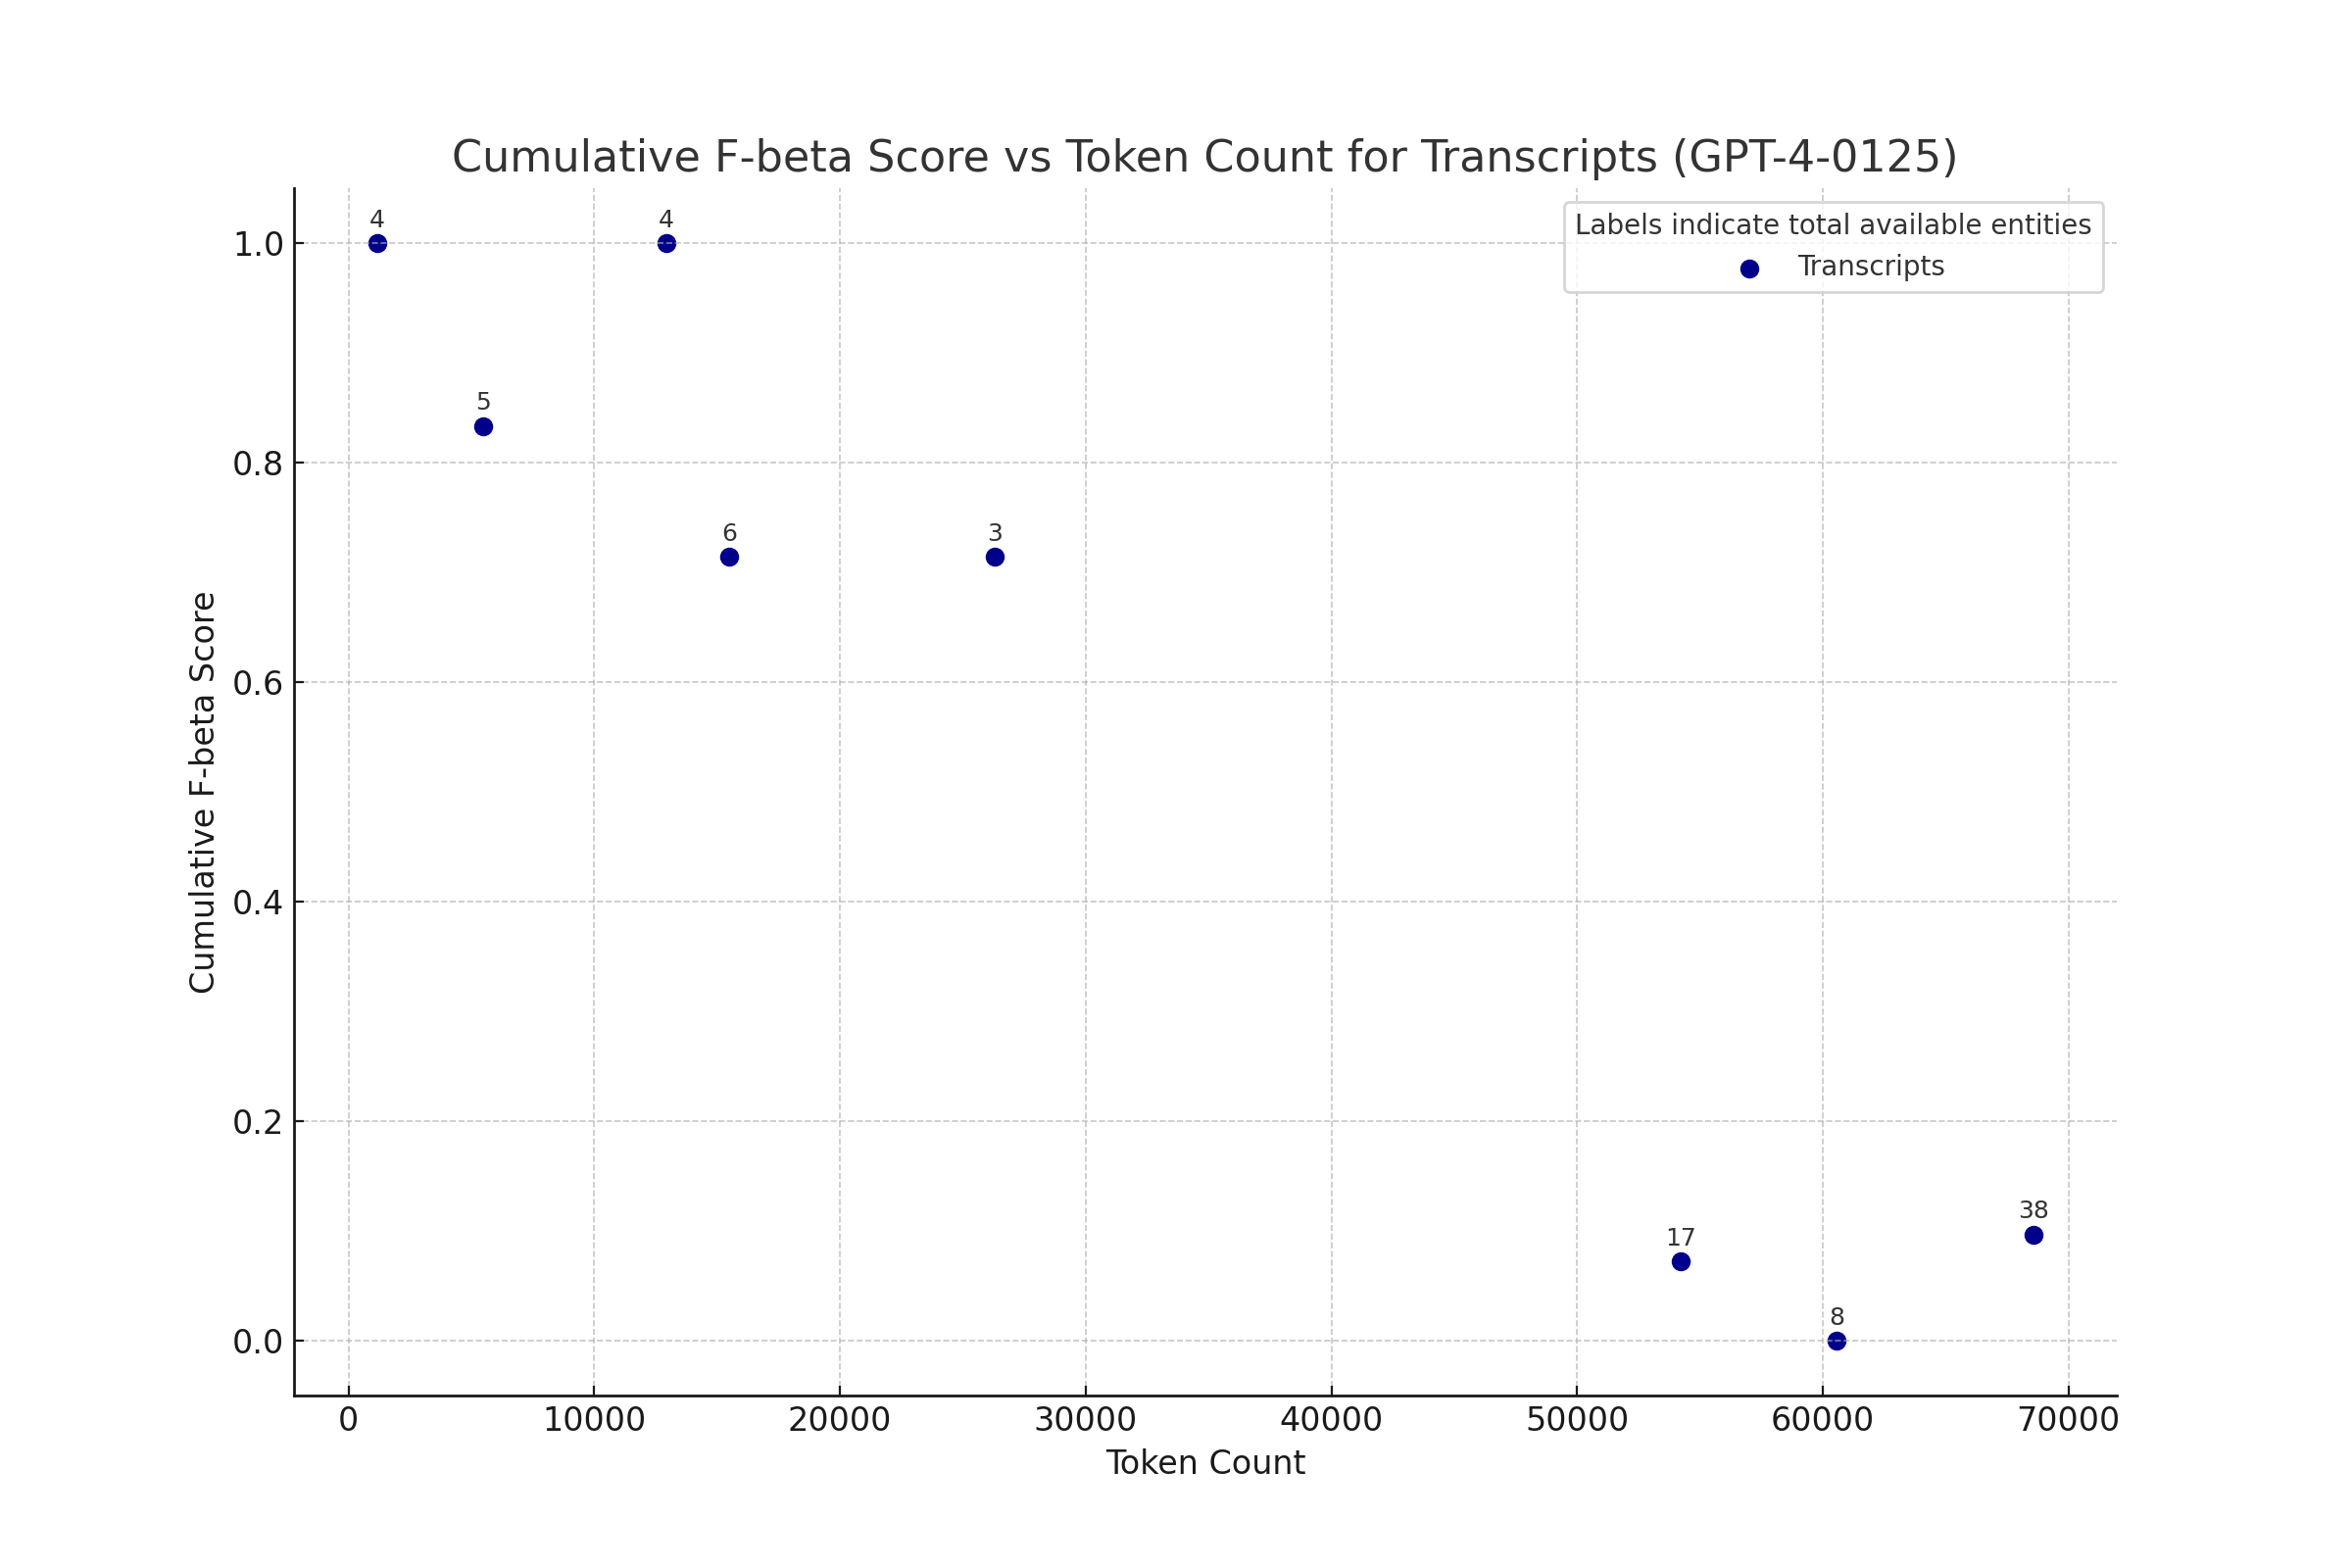

In [136]:
Image(filename='../graphs/transcripts_gpt-4-0125.png')

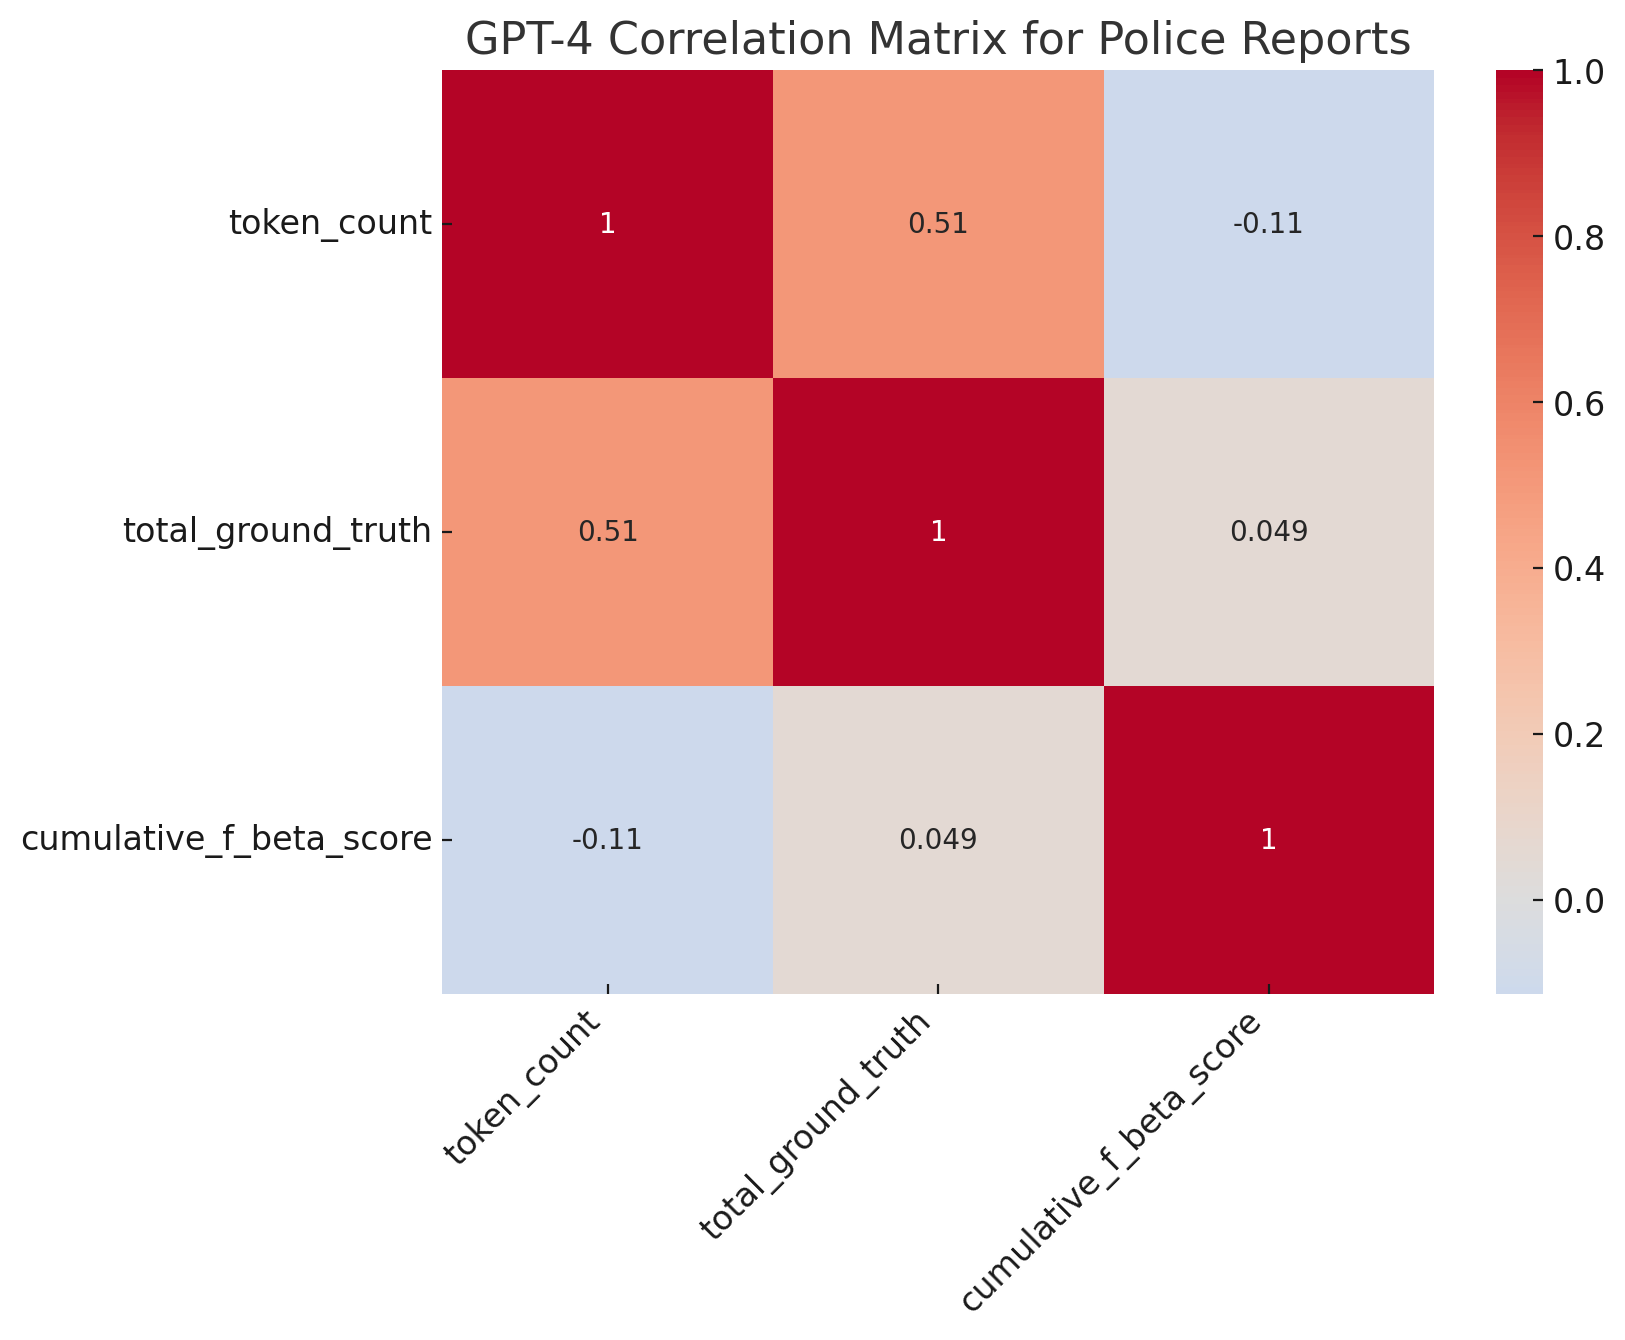

In [137]:
Image(filename='../graphs/gpt4_reports_correlation_heatmap.png')

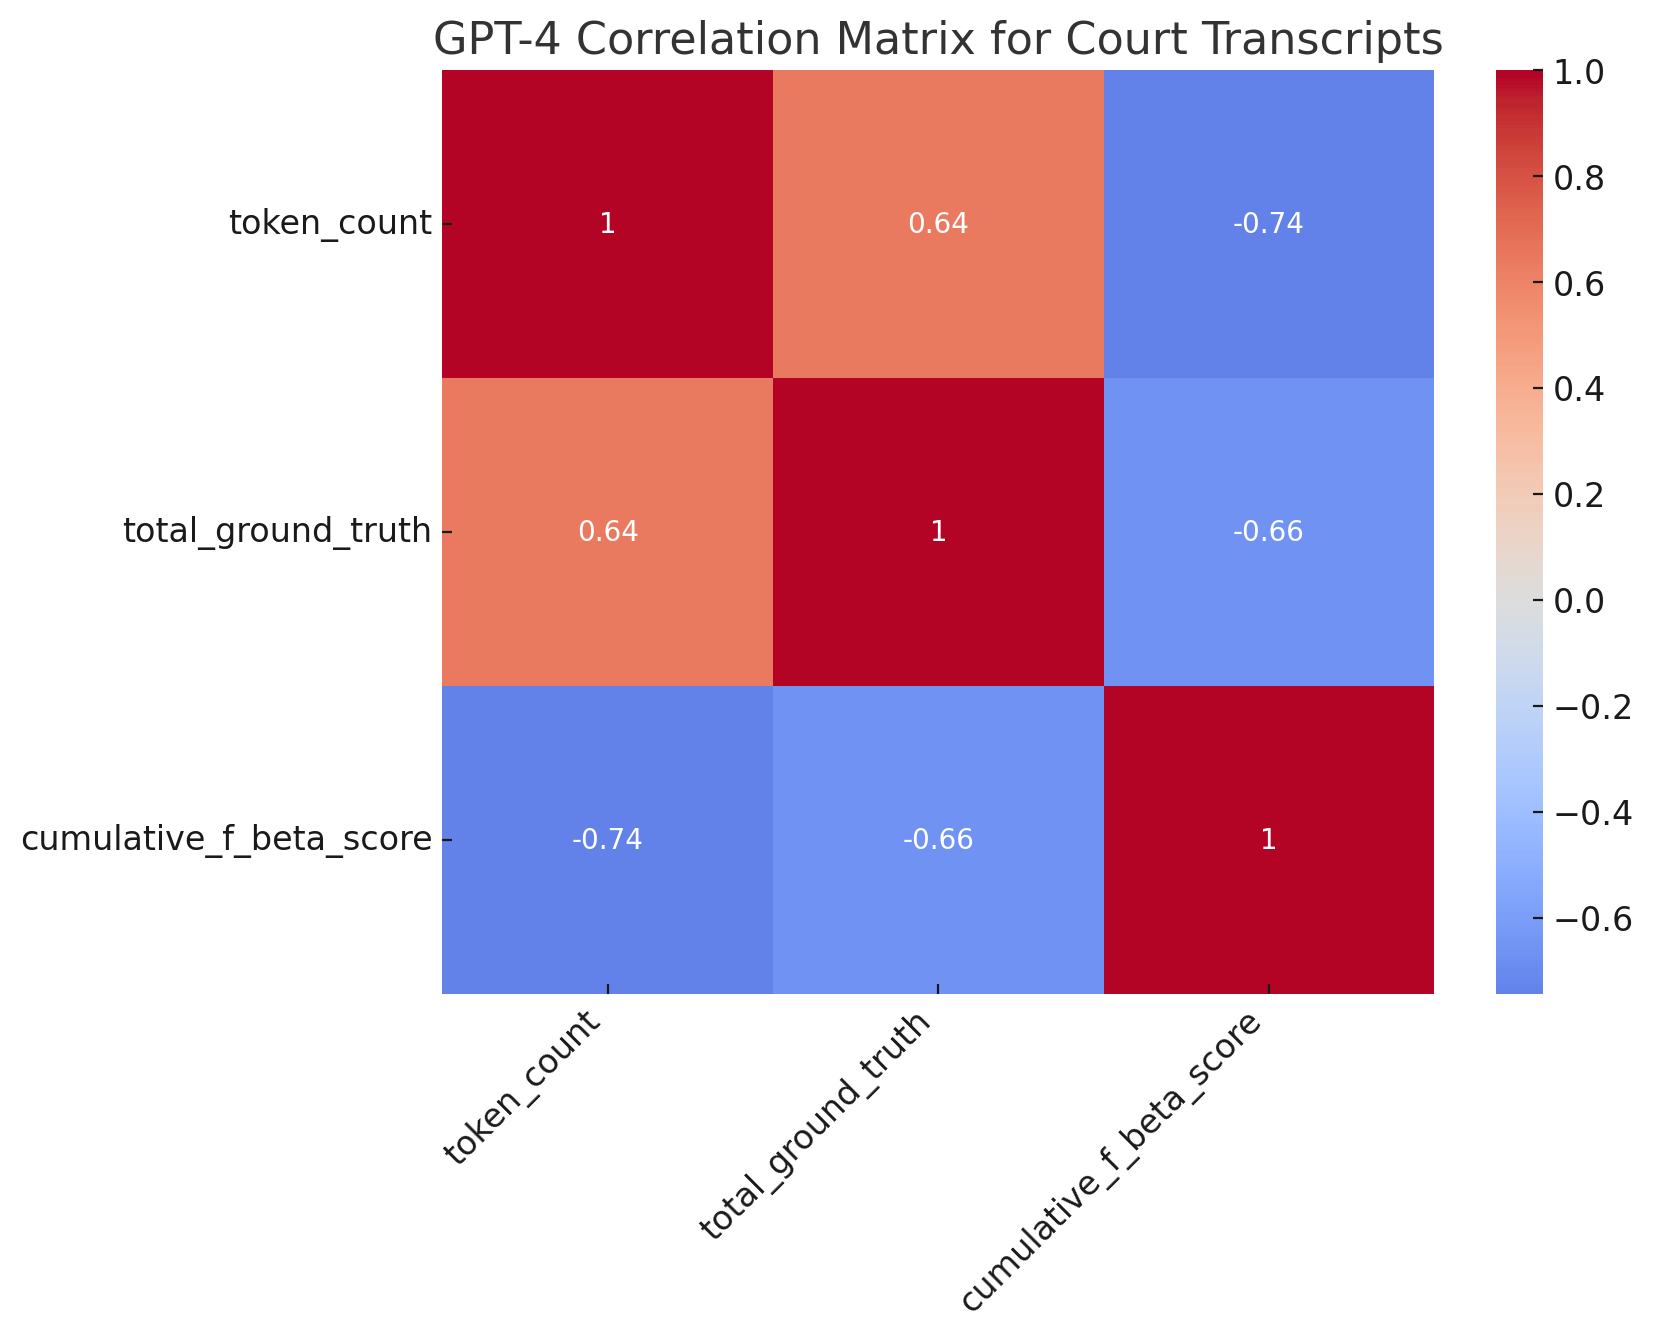

In [138]:
Image(filename='../graphs/gpt4_transcripts_correlation_heatmap.png')

These insights largely resonate with the (experiments)[https://blog.langchain.dev/multi-needle-in-a-haystack/] done by the team at LangChain whose work supports the assertion that the performance of long-context language models diminishes as the number of facts for retrieval and reasoning increases. 

**Iterative Approach for Smaller Models: Enhancing Performance on Legal Documents**

Given that we could mimic the behavior of a long context window with smaller models, we decided to design an iterative approach that processes the document page by page. This method was applied to three models: GPT-3.5-Turbo-0125, Claude 3 Haiku, and Claude 3 Sonnet.

In [139]:
full_doc = data[data.Model.str.contains("GPT-3.5|Haiku|Sonnet") & data.Type.str.contains("Full doc")]

full_doc

,Model,Data Type,Score,Type,API calls per doc
6,GPT-3.5-0125,Reports,0.828089,Full doc,Determined by page count
7,GPT-3.5-0125,Transcripts,0.940809,Full doc,Determined by page count
14,Claude 3 Haiku,Reports,0.889068,Full doc,Determined by page count
15,Claude 3 Haiku,Transcripts,0.974182,Full doc,Determined by page count
18,Claude 3 Sonnet,Reports,0.914112,Full doc,Determined by page count
19,Claude 3 Sonnet,Transcripts,0.974182,Full doc,Determined by page count


The iterative approach with the smaller models far outperforms the long context retrieval approach with large models. This demonstrates that breaking down the document into smaller chunks and processing it iteratively can lead to significantly better results compared to using larger models with a single long context window.

**Advancing Beyond Traditional RAG: Named-Entity-Based Page Retrieval**

Our experiments with traditional retrieval-augmented generation (RAG) using the GPT-3-0125 model yielded promising results, with scores of 0.815072 for reports and 0.791220 for transcripts. These findings suggest that traditional RAG approaches can outperform long context LLM retrieval methods, which often face challenges with diminishing performance as the number of facts for retrieval and reasoning increases. For a detailed comparison with traditional RAG results, refer to the [first](https://hrdag.org/tech-notes/large-language-models-IPNO.html)  chapter of our work.

Notably, even the worst-performing model from the iterative test, GPT-3.5-Turbo, outperformed the long context models. This observation led us to refocus our efforts on finding more effective methods than traditional RAG, rather than investing additional resources in testing the Claude models with traditional RAG. While traditional RAG demonstrated strong performance, it did not surpass the effectiveness of iterating over each page of the document. To address this challenge and optimize the process, we developed a named-entity-based page retrieval approach. This technique focuses on extracting the 20 pages with the highest number of named entities from the input documents, providing more targeted and relevant chunks of text for analysis while streamlining the processing workflow.

In [140]:
ner = data[data.Model.str.contains("GPT-3.5|Haiku|Sonnet") & data.Type.str.contains("Used")]

compare_full_doc_w_ner = pd.concat([full_doc, ner])

compare_full_doc_w_ner

,Model,Data Type,Score,Type,API calls per doc
6,GPT-3.5-0125,Reports,0.828089,Full doc,Determined by page count
7,GPT-3.5-0125,Transcripts,0.940809,Full doc,Determined by page count
14,Claude 3 Haiku,Reports,0.889068,Full doc,Determined by page count
15,Claude 3 Haiku,Transcripts,0.974182,Full doc,Determined by page count
18,Claude 3 Sonnet,Reports,0.914112,Full doc,Determined by page count
19,Claude 3 Sonnet,Transcripts,0.974182,Full doc,Determined by page count
8,GPT-3.5-0125,Reports,0.834130,Used NER to find 20 pages with most number of ...,20
9,GPT-3.5-0125,Transcripts,0.832770,Used NER to find 20 pages with most number of ...,20
16,Claude 3 Haiku,Reports,0.862806,Used NER to find 20 pages with most number of ...,20
17,Claude 3 Haiku,Transcripts,0.828494,Used NER to find 20 pages with most number of ...,20


The named-entity-based page retrieval approach brings us closer to the scores achieved when iterating over the entire document. In several cases, the named-entity-based approach yields scores that are remarkably close to those obtained by processing the full document.

For instance, the Claude 3 Sonnet model achieves a score of 0.900734 on reports using the named-entity-based approach, which is just 0.013378 points lower than the score of 0.914112 obtained when iterating over the full document. Similarly, for the GPT-3.5-0125 model on reports, the named-entity-based approach achieves a score of 0.834130, surpassing the score of 0.828089 obtained by processing the entire document.

While the named-entity-based approach may not always match the scores of processing the entire document, it offers significant advantages in terms of computational efficiency and resource optimization. By focusing on the most informative pages based on named entities, we can substantially reduce the number of API calls required per document. 

**Advanced RAG: Semantic Chunking**

To optimize the named-entity-based approach, we developed two semantic chunking techniques that extract relevant text chunks around identified named entities, aiming to capture essential information while reducing computational resources.

**Semantic Chunking Variant 1: Natural Chunks**

The first variant extracts a context window around each identified named entity, creating natural chunks. BERT embeddings are generated for these chunks, and deduplication is performed using cosine similarity. The deduplicated chunks are stored in a FAISS database for retrieval.

Scores for Variant 1:

- GPT-3.5-0125 on Reports: 0.739000
- GPT-3.5-0125 on Transcripts: 0.726000

**Semantic Chunking Variant 2: Artificial Chunks**

The second variant takes a different approach to create artificial chunks. The preprocess_document function extracts named entities (specifically, persons) from the document and their surrounding context using a specified context size. BERT embeddings are then generated for these extracted entity contexts using the 'bert-base-nli-mean-tokens' model.

To reduce redundancy, the function deduplicates the entity contexts based on the cosine similarity of their embeddings, using a specified similarity threshold. The deduplicated entity contexts for each entity are then concatenated to create a single text representation.

Finally, the concatenated text is split into fixed-size chunks with a specified overlap, creating artificial chunks. These artificial chunks are stored in a FAISS database for efficient retrieval.

Scores for Variant 2:

- GPT-3.5-0125 on Reports: 0.726000
- GPT-3.5-0125 on Transcripts: 0.794000

Both semantic chunking variants aim to balance capturing essential information and reducing computational resources. However, the scores indicate that both variants perform worse than the named-entity-based approach. The named-entity-based approach achieves scores of 0.834130 for reports and 0.832770 for transcripts using GPT-3.5-0125, outperforming both semantic chunking variants.

Given these results, we conclude that the named-entity-based approach remains the most effective method for our document analysis task, providing a better balance between performance and efficiency compared to the semantic chunking variants explored.